In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import math
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/raw/retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [4]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [5]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

## EDA and Preprocessing

### Data type conversion

In [6]:
df.Date = pd.to_datetime(df.Date)
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 73100 entries, 0 to 73099
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
73100 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 571.2 KB


In [7]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


### Check outliers

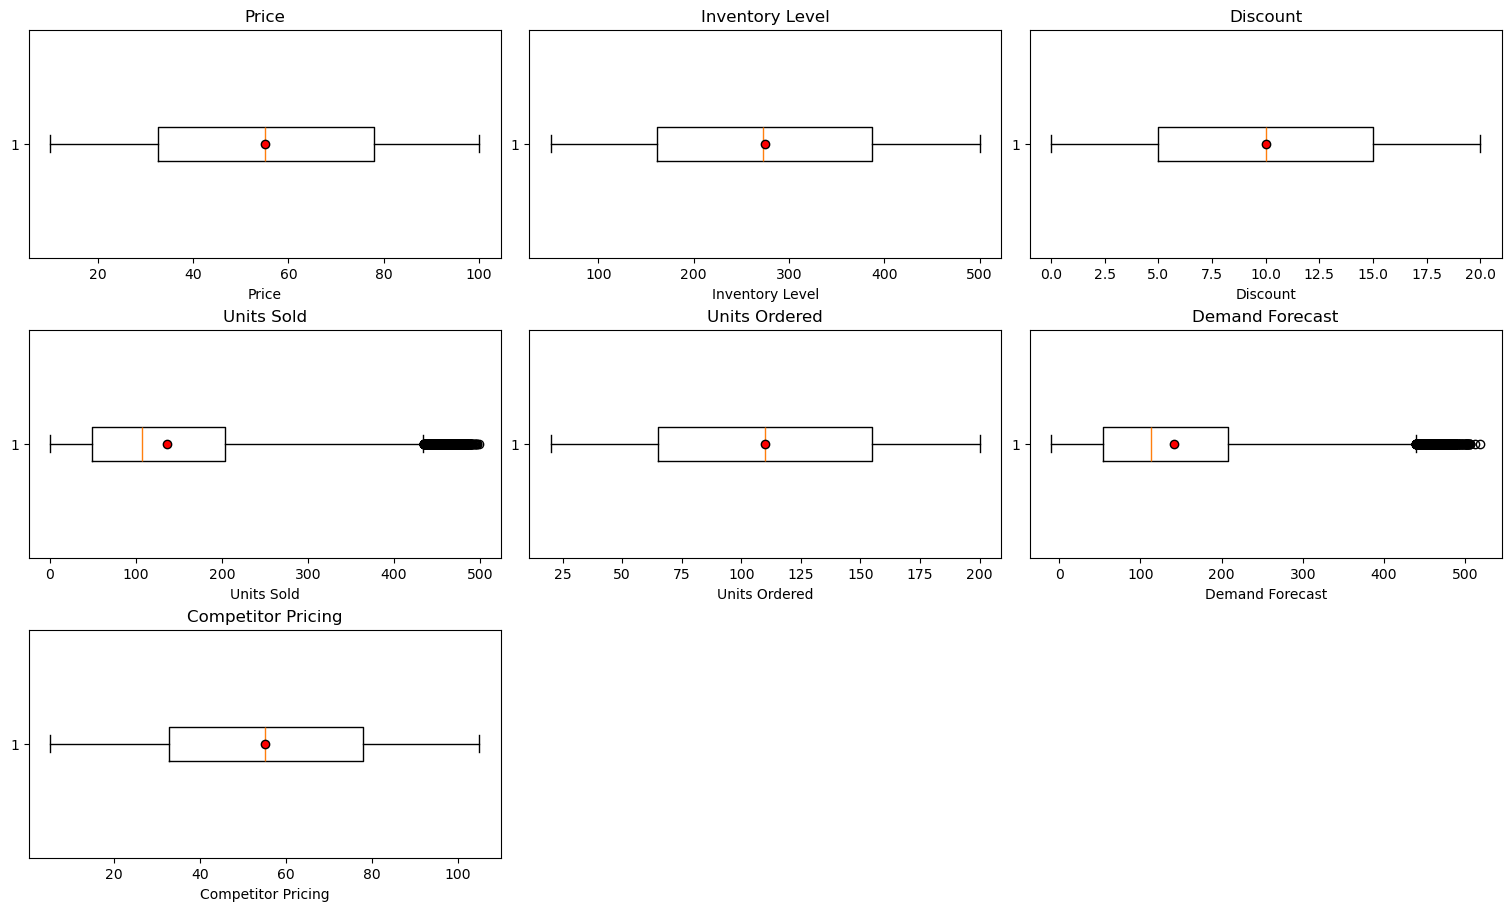

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4), constrained_layout=True)

cols = ['Price', 'Inventory Level', 'Discount', 'Units Sold', 'Units Ordered','Demand Forecast','Competitor Pricing']
ncols = 3
nrows = math.ceil(len(cols) / ncols)

# Close any previous figures to avoid duplicate/empty outputs
plt.close('all')

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3*nrows), constrained_layout=True)
axes = axes.flatten()  # make indexing linear

for i, col in enumerate(cols):
    axes[i].boxplot(df[col].dropna(), vert=False, showmeans=True,
                    meanprops=dict(marker='o', markerfacecolor='r', markeredgecolor='k'))
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

# Hide any unused axes (for a 2x3 grid with 5 plots this hides one axis)
for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.show()

## Deep Analysis about outliers

### Unit Sold

In [9]:
df["Units Sold"].describe()

count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Units Sold, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x752b8df834c0>,
 'caps': [<matplotlib.lines.Line2D at 0x752b8df83ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x752b8df822c0>],
 'medians': [<matplotlib.lines.Line2D at 0x752b8dfa8100>],
 'fliers': [<matplotlib.lines.Line2D at 0x752b8dfa8400>],
 'means': []}

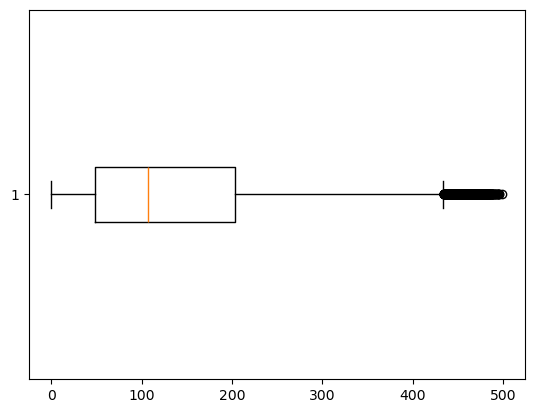

In [10]:
plt.boxplot(df["Units Sold"],vert=False)

In [11]:
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = df[df['Units Sold'] < lower_bound]['Units Sold'].count()

# Outliers above the upper bound
upper_outliers = df[df['Units Sold'] > upper_bound]['Units Sold'].count()

# Total count
total_outliers = lower_outliers + upper_outliers

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Outlier Bound (1.5 * IQR): {lower_bound}")
print(f"Upper Outlier Bound (1.5 * IQR): {upper_bound}")
print(f"\nTotal Outliers Detected: {total_outliers}")
print(f"Percentage of Outliers: {total_outliers / len(df) * 100:.2f}%")

Q1 (25th percentile): 49.0
Q3 (75th percentile): 203.0
IQR: 154.0
Lower Outlier Bound (1.5 * IQR): -182.0
Upper Outlier Bound (1.5 * IQR): 434.0

Total Outliers Detected: 715
Percentage of Outliers: 0.98%


-  FLAGGINNG (Context Preservation)
-  Create the binary flag based on the original data (df['Units Sold']).

### Flagging and Capping for Units Sold Outliers

In [12]:
## Flagging for Units Sold Outliers
df['Units Sold Outlier Flag'] = np.where((df['Units Sold'] < lower_bound) | (df['Units Sold'] > upper_bound), 1, 0)

## starting capping
## capping for the upper bound
df['Units Sold'] = np.where(
    df['Units Sold'] > upper_bound,
    upper_bound,
    df['Units Sold']
)

## capping for the lower bound
final_lower_bound = max(0, lower_bound) ## ensure no negative values
df['Units Sold'] = np.where(
    df['Units Sold'] < final_lower_bound,
    final_lower_bound,
    df['Units Sold']
)

print("\n✅ Capping and Flagging Complete.")
print(f"New feature 'Units_Sold_Outlier_Flag' created.")
print(f"Units Sold column capped between {final_lower_bound:.2f} and {upper_bound:.2f}.")


✅ Capping and Flagging Complete.
New feature 'Units_Sold_Outlier_Flag' created.
Units Sold column capped between 0.00 and 434.00.


### Demand Forecast 

In [13]:
df["Demand Forecast"].describe()

count    73100.000000
mean       141.494720
std        109.254076
min         -9.990000
25%         53.670000
50%        113.015000
75%        208.052500
max        518.550000
Name: Demand Forecast, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x752b8e617460>,
 'caps': [<matplotlib.lines.Line2D at 0x752b8e617940>,
 'boxes': [<matplotlib.lines.Line2D at 0x752b8e617160>],
 'medians': [<matplotlib.lines.Line2D at 0x752b8e617f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x752b8e640280>],
 'means': []}

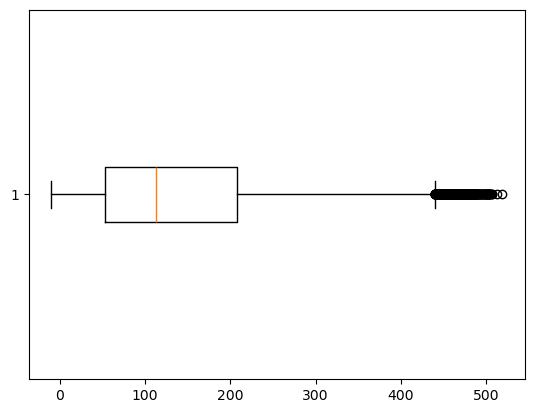

In [14]:
plt.boxplot(df["Demand Forecast"],vert=False)

In [15]:
Q1 = df['Demand Forecast'].quantile(0.25)
Q3 = df['Demand Forecast'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = df[df['Demand Forecast'] < lower_bound]['Demand Forecast'].count()

# Outliers above the upper bound
upper_outliers = df[df['Demand Forecast'] > upper_bound]['Demand Forecast'].count()

# Total count
total_outliers = lower_outliers + upper_outliers

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Outlier Bound (1.5 * IQR): {lower_bound}")
print(f"Upper Outlier Bound (1.5 * IQR): {upper_bound}")
print(f"\nTotal Outliers Detected: {total_outliers}")
print(f"Percentage of Outliers: {total_outliers / len(df) * 100:.2f}%")

Q1 (25th percentile): 53.67
Q3 (75th percentile): 208.0525
IQR: 154.3825
Lower Outlier Bound (1.5 * IQR): -177.90375
Upper Outlier Bound (1.5 * IQR): 439.62625

Total Outliers Detected: 732
Percentage of Outliers: 1.00%


### Flagging and Capping Demand Forecast Outliers

In [16]:
## Flagging for Demand Forecast Outliers
df['Demand Forecast Outlier Flag'] = np.where((df['Demand Forecast'] < lower_bound) | (df['Demand Forecast'] > upper_bound), 1, 0)

## starting capping
## capping for the upper bound
df['Demand Forecast'] = np.where(
    df['Demand Forecast'] > upper_bound,
    upper_bound,
    df['Demand Forecast']
)

## capping for the lower bound
final_lower_bound = max(0, lower_bound) ## ensure no negative values
df['Demand Forecast'] = np.where(
    df['Demand Forecast'] < final_lower_bound,
    final_lower_bound,
    df['Demand Forecast']
)

print("\n✅ Capping and Flagging Complete.")
print(f"New feature 'Demand_Forecast_Outlier_Flag' created.")
print(f"Demand Forecast column capped between {final_lower_bound:.2f} and {upper_bound:.2f}.")


✅ Capping and Flagging Complete.
New feature 'Demand_Forecast_Outlier_Flag' created.
Demand Forecast column capped between 0.00 and 439.63.


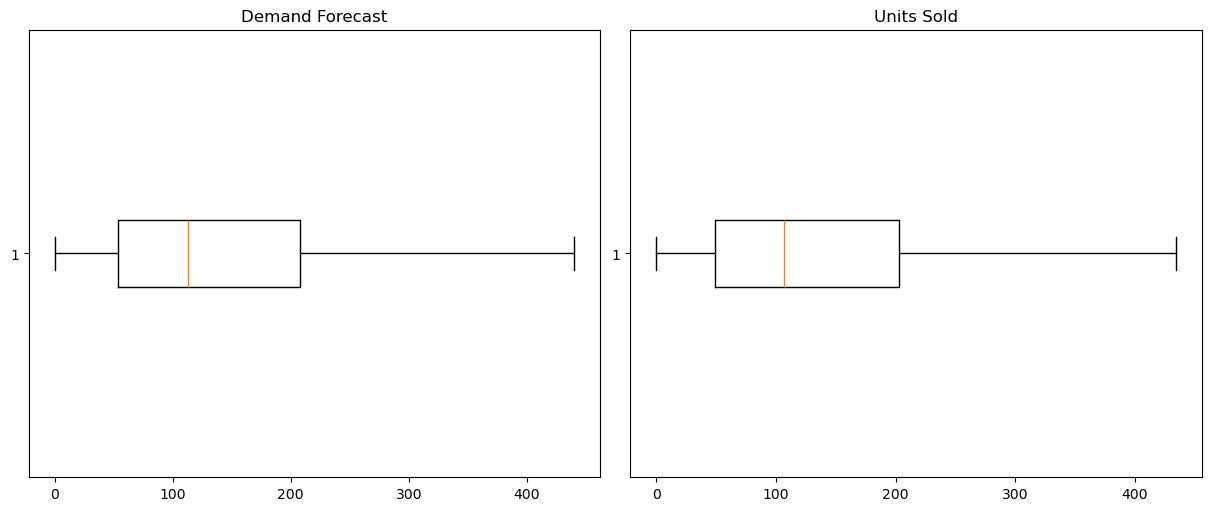

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), constrained_layout=True)

axes[0].boxplot(df["Demand Forecast"], vert=False)
axes[0].set_title("Demand Forecast")

axes[1].boxplot(df["Units Sold"], vert=False)
axes[1].set_title("Units Sold")

plt.show()

- Outliyers are gone now 

### Date-Based Feature Extraction

In [18]:
df['Day_of_week'] = df['Date'].dt.dayofweek
df['day_of_month'] = df['Date'].dt.day
df['day_of_year'] = df['Date'].dt.dayofyear
df['week_of_year'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['quarter'] = df['Date'].dt.quarter
df['is_weekend'] = df['Day_of_week'].isin([5, 6]).astype(int)

In [19]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Units Sold Outlier Flag,Demand Forecast Outlier Flag,Day_of_week,day_of_month,day_of_year,week_of_year,month,year,quarter,is_weekend
0,2022-01-01,S001,P0001,Groceries,North,231,127.0,55,135.47,33.50,...,0,0,5,1,1,52,1,2022,1,1
1,2022-01-01,S001,P0002,Toys,South,204,150.0,66,144.04,63.01,...,0,0,5,1,1,52,1,2022,1,1
2,2022-01-01,S001,P0003,Toys,West,102,65.0,51,74.02,27.99,...,0,0,5,1,1,52,1,2022,1,1
3,2022-01-01,S001,P0004,Toys,North,469,61.0,164,62.18,32.72,...,0,0,5,1,1,52,1,2022,1,1
4,2022-01-01,S001,P0005,Electronics,East,166,14.0,135,9.26,73.64,...,0,0,5,1,1,52,1,2022,1,1


## Cyclical Feature Encoding (for Season , Month , Days)

In [20]:
#month
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

#day of week
df['day_of_week_sin'] = np.sin(2 * np.pi * df['Day_of_week']/7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['Day_of_week']/7)

#day of month
df['day_of_month_sin'] = np.sin(2 * np.pi * df['day_of_month']/30.5)  ## average days in month
df['day_of_month_cos'] = np.cos(2 * np.pi * df['day_of_month']/30.5)

#day of year
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year']/365.25) ## accounting leap years
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year']/365.25)

#Week of year
df['week_of_year_sin'] = np.sin(2 * np.pi * df['week_of_year']/52)
df['week_of_year_cos'] = np.cos(2 * np.pi * df['week_of_year']/52)

In [21]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,month_sin,month_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,day_of_year_sin,day_of_year_cos,week_of_year_sin,week_of_year_cos
0,2022-01-01,S001,P0001,Groceries,North,231,127.0,55,135.47,33.50,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
1,2022-01-01,S001,P0002,Toys,South,204,150.0,66,144.04,63.01,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
2,2022-01-01,S001,P0003,Toys,West,102,65.0,51,74.02,27.99,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
3,2022-01-01,S001,P0004,Toys,North,469,61.0,164,62.18,32.72,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
4,2022-01-01,S001,P0005,Electronics,East,166,14.0,135,9.26,73.64,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0


### Lag Features (Historical Sales)

In [22]:
grouped = df.groupby(['Store ID', 'Product ID'])
lags = [1,2,3,4,5,6,7,14,21,30,31,60,90,365]


for lag in lags:
    df[f'sales_lag_{lag}'] = grouped['Units Sold'].shift(lag)

In [28]:
grouped.groups.keys()

dict_keys([('S001', 'P0001'), ('S001', 'P0002'), ('S001', 'P0003'), ('S001', 'P0004'), ('S001', 'P0005'), ('S001', 'P0006'), ('S001', 'P0007'), ('S001', 'P0008'), ('S001', 'P0009'), ('S001', 'P0010'), ('S001', 'P0011'), ('S001', 'P0012'), ('S001', 'P0013'), ('S001', 'P0014'), ('S001', 'P0015'), ('S001', 'P0016'), ('S001', 'P0017'), ('S001', 'P0018'), ('S001', 'P0019'), ('S001', 'P0020'), ('S002', 'P0001'), ('S002', 'P0002'), ('S002', 'P0003'), ('S002', 'P0004'), ('S002', 'P0005'), ('S002', 'P0006'), ('S002', 'P0007'), ('S002', 'P0008'), ('S002', 'P0009'), ('S002', 'P0010'), ('S002', 'P0011'), ('S002', 'P0012'), ('S002', 'P0013'), ('S002', 'P0014'), ('S002', 'P0015'), ('S002', 'P0016'), ('S002', 'P0017'), ('S002', 'P0018'), ('S002', 'P0019'), ('S002', 'P0020'), ('S003', 'P0001'), ('S003', 'P0002'), ('S003', 'P0003'), ('S003', 'P0004'), ('S003', 'P0005'), ('S003', 'P0006'), ('S003', 'P0007'), ('S003', 'P0008'), ('S003', 'P0009'), ('S003', 'P0010'), ('S003', 'P0011'), ('S003', 'P0012'), (

In [37]:
df.head(1000)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_14,sales_lag_21,sales_lag_30,sales_lag_31,sales_lag_60,sales_lag_90,sales_lag_365
0,2022-01-01,S001,P0001,Groceries,North,231,127.0,55,135.47,33.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,S001,P0002,Toys,South,204,150.0,66,144.04,63.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,S001,P0003,Toys,West,102,65.0,51,74.02,27.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,S001,P0004,Toys,North,469,61.0,164,62.18,32.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,S001,P0005,Electronics,East,166,14.0,135,9.26,73.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-01-10,S005,P0016,Groceries,East,407,103.0,90,107.56,60.15,...,343.0,200.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2022-01-10,S005,P0017,Furniture,East,308,266.0,164,259.60,31.07,...,15.0,256.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2022-01-10,S005,P0018,Furniture,South,331,235.0,49,234.25,22.58,...,90.0,118.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2022-01-10,S005,P0019,Electronics,East,481,154.0,169,169.61,85.04,...,143.0,244.0,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rolling Window Features (Trends and Volatility)

In [40]:
windowns = [3,7,14,30,60]
shifted_sales = grouped['Units Sold'].shift(1)

for window in windowns:
    df[f'sales_rolling_mean_{window}'] = shifted_sales.rolling(window=window).mean()
    df[f'sales_rolling_std_{window}'] = shifted_sales.rolling(window=window).std()
    df[f'sales_rolling_min_{window}'] = shifted_sales.rolling(window=window).min()
    df[f'sales_rolling_max_{window}'] = shifted_sales.rolling(window=window).max()
    df[f'sales_rolling_median_{window}'] = shifted_sales.rolling(window=window).median()

In [41]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,sales_rolling_mean_30,sales_rolling_std_30,sales_rolling_min_30,sales_rolling_max_30,sales_rolling_median_30,sales_rolling_mean_60,sales_rolling_std_60,sales_rolling_min_60,sales_rolling_max_60,sales_rolling_median_60
0,2022-01-01,S001,P0001,Groceries,North,231,127.0,55,135.47,33.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,S001,P0002,Toys,South,204,150.0,66,144.04,63.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,S001,P0003,Toys,West,102,65.0,51,74.02,27.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,S001,P0004,Toys,North,469,61.0,164,62.18,32.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,S001,P0005,Electronics,East,166,14.0,135,9.26,73.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.shape

(73100, 74)

In [44]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Units Sold Outlier Flag',
       'Demand Forecast Outlier Flag', 'Day_of_week', 'day_of_month',
       'day_of_year', 'week_of_year', 'month', 'year', 'quarter', 'is_weekend',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_year_sin',
       'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos',
       'sales_lag_1', 'sales_lag_2', 'sales_lag_3', 'sales_lag_4',
       'sales_lag_5', 'sales_lag_6', 'sales_lag_7', 'sales_lag_14',
       'sales_lag_21', 'sales_lag_30', 'sales_lag_31', 'sales_lag_60',
       'sales_lag_90', 'sales_lag_365', 'sales_rolling_mean_3',
       'sales_rolling_std_3', 'sales_rolling_min_3', 'sales_rolling_max_3',
       'sales_rolling